In [29]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras


In [31]:
import matplotlib.pyplot as plt

In [33]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

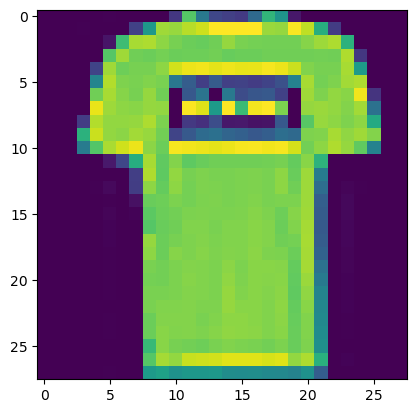

In [35]:
plt.imshow(x_train[1])

In [37]:
x_train.shape

(60000, 28, 28)

In [39]:
x_test.shape

(10000, 28, 28)

In [51]:
class_names = [ 'T-shirt/top','Trouser','pullover','Dress','Coat','sandals','shirt','sneaker','bag','ankle boot']

In [43]:

#Normalize the train and test images

x_train = x_train/255.0
x_test = x_test/255.0

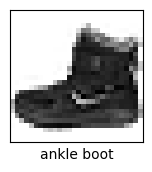

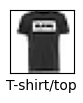

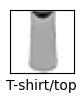

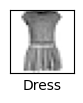

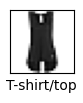

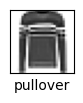

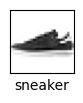

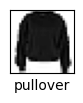

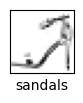

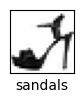

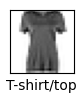

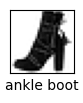

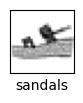

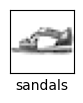

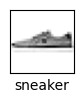

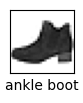

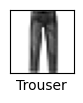

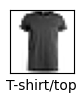

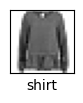

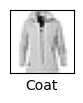

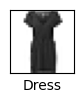

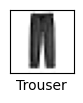

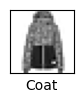

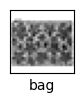

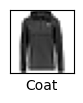

In [63]:
# Plot the sample Train Images
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.show()

In [65]:
x_train.shape

(60000, 28, 28)

In [67]:
# Initialize the model with 1 Hidden layer (No of Neurons 128)
# Check the number of parameters in the model
model=keras.Sequential([
keras.layers.Flatten (input_shape=(28,28)),
keras.layers.Dense (128, activation='relu'),
keras.layers.Dense (10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Train the model for 10 epochs
# If batch_size = 32, then the No of Batches 60000/32 -1875 |
model.fit(x_train,y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7830 - loss: 0.6320
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8583 - loss: 0.3900
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8736 - loss: 0.3413
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8824 - loss: 0.3169
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8923 - loss: 0.2932
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8978 - loss: 0.2794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9018 - loss: 0.2690
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9058 - loss: 0.2540
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9088 - loss: 0.2489
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9101 - loss: 0.2379


In [75]:
#Evaluate the model and obtain the accuracy and loss
test_loss, test_acc = model.evaluate(x_test,y_test)
print("\n Test accuracy:", test_acc)
print('\n Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8781 - loss: 0.3524

 Test accuracy: 0.8779000043869019

 Test loss: 0.3538675308227539


In [81]:
# Make predictions on Test Images
# Look at the probality score obtained on predicting the Test_image[0]
prediction = model.predict(x_test)
print (prediction[0])
print("\n Predicted value: ", np.argmax(prediction[0]))
print("\n Groundtruth value:", y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7.6615908e-07 3.4499738e-08 1.7245202e-07 7.7248634e-09 9.0357333e-11
 3.6415285e-03 2.1769136e-08 2.1029895e-02 7.3539422e-07 9.7532690e-01]

 Predicted value:  9

 Groundtruth value: 9
